# Intro

Overview of Main Points:
- This dataset is about video-games.
- We collected it using google-form and QR-codes.
- We are going to do Market Segmentation on it using Machine learning algorithms.
- Our Machine learning models will be k-means clustering and PCA for dimensionality reduction.


Column-Names (Google-form Quesions):
- Username : Username
- Age : How old are you?
- Gender : Kindly select your gender ?
- Games-Lovers : How much do you like playing video games?
- PC | Laptop | Console : Where do you usually play video games?
- Game-type : What type of video games do you like to play?
- Games : What game do you play ?
- Play-Games H/W : How much time in a week do you spend on video games ? ( in hours )
- ?PlayInWeekend : Do you play in the weekends?
- ?PlayInBusyTimes : Do you play video games even if you are very busy?
- ?GamesUseful : Do you believe video games teach you something?

# Loading Libraries and Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Username,Age,Gender,Games-Lovers,PC | Laptop | Console,Game-type,Games,Play-Games H/W,?PlayInWeekend,?PlayInBusyTimes,?GameBenefit
0,*********************,from 18 to 20,Male,Some What,PC Or Laptop,FPS Shooter,Valorant;Fortnite;COD-WarZone,3.0,Yes,No,Yes
1,*********************,from 18 to 20,Female,Not Really,Console,Role play games,Valorant;Pubg;Fortnite;COD-WarZone;Fifa,13.0,No,Yes,No
2,*********************,from 18 to 20,Female,Not at all,MobilePhone,Adventure,Others,0.0,No,No,No
3,*********************,from 18 to 20,Male,Very much,PC Or Laptop;Console,Action;Adventure;Role play games,Valorant;Others,14.0,Yes,No,Yes
4,*********************,from 18 to 20,Male,Very much,PC Or Laptop;Console,Action;Adventure;Role play games,Valorant;Others,14.0,Yes,No,Yes


In [4]:
# Display statistical summary
df.describe()

,Play-Games H/W
count,220.000000
mean,16.154545
std,67.802855
min,0.000000
25%,2.750000
50%,6.000000
75%,14.000000
max,888.000000


In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Username               221 non-null    object 
 1   Age                    221 non-null    object 
 2   Gender                 219 non-null    object 
 3   Games-Lovers           221 non-null    object 
 4   PC | Laptop | Console  219 non-null    object 
 5   Game-type              221 non-null    object 
 6   Games                  221 non-null    object 
 7   Play-Games H/W         220 non-null    float64
 8   ?PlayInWeekend         221 non-null    object 
 9   ?PlayInBusyTimes       221 non-null    object 
 10  ?GameBenefit           221 non-null    object 
dtypes: float64(1), object(10)
memory usage: 19.1+ KB


# Data Cleaning

In [6]:
# Drop unnecessary columns
df.drop(columns=["Username", "?PlayInWeekend"], inplace=True)

In [7]:
# Rename columns for better clarity
df.rename(columns={'PC | Laptop | Console': 'Machine-Setup'}, inplace=True)

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Handling missing values
df['Play-Games H/W'].fillna(df['Play-Games H/W'].median(), inplace=True)
df.dropna(inplace=True)

In [10]:
# Clip the values in "Play-Games H/W" to a range of (0, 50)
df['Play-Games H/W'] = df['Play-Games H/W'].clip(0, 50)

# Data Exploration

Perform data exploration by using some aggregate functions and data visualization tools.

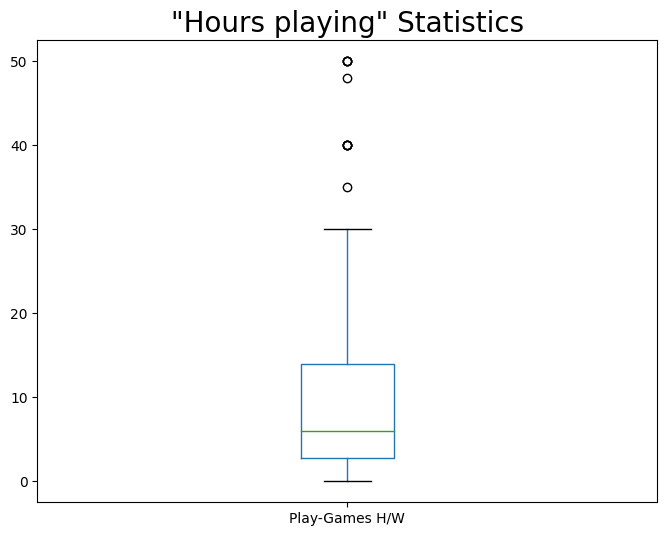

In [11]:
# Boxplot for 'Play-Games H/W'
plt.figure(figsize=(8, 6))
df.boxplot(column=['Play-Games H/W'], grid=False)
plt.title('"Hours playing" Statistics', fontsize=20)
plt.show()

In [12]:
# Machine-Setup distribution
pc_count = df["Machine-Setup"].str.contains('PC').sum()
mob_count = df["Machine-Setup"].str.contains('Mobile').sum()
cons_count = df["Machine-Setup"].str.contains('Console').sum()

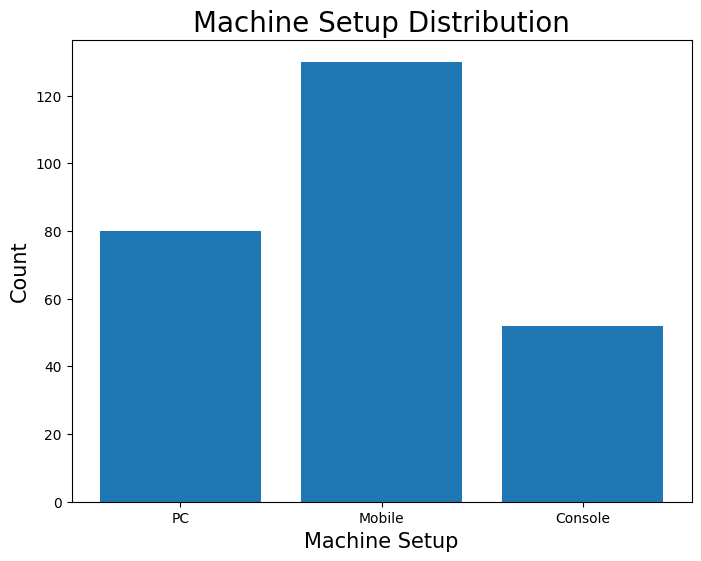

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(['PC', 'Mobile', 'Console'], [pc_count, mob_count, cons_count])
plt.xlabel("Machine Setup", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Machine Setup Distribution", fontsize=20)
plt.show()

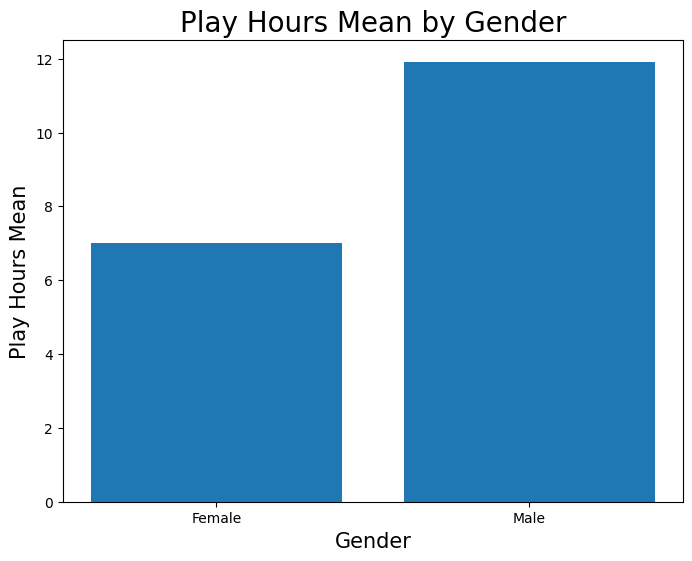

In [14]:
# Play hours mean by gender
gender_play_mean = df.groupby('Gender')['Play-Games H/W'].mean()

plt.figure(figsize=(8, 6))
plt.bar(gender_play_mean.index, gender_play_mean.values)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Play Hours Mean", fontsize=15)
plt.title("Play Hours Mean by Gender", fontsize=20)
plt.show()

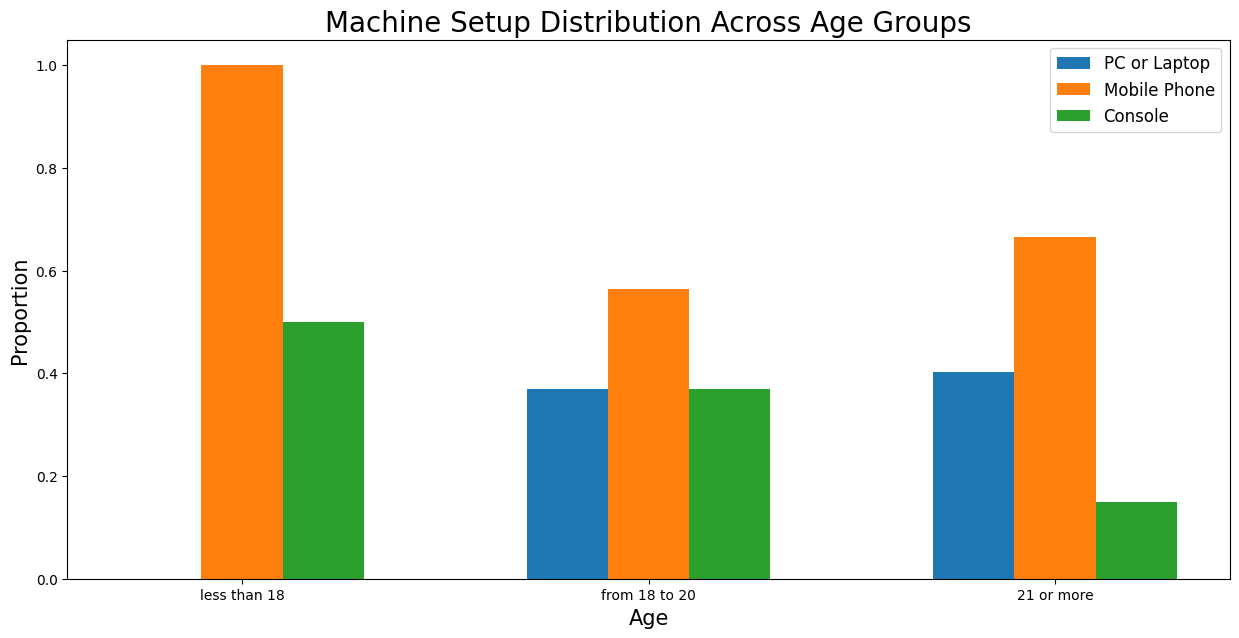

In [15]:
# Machine Setup distribution across age groups
age_groups = ['less than 18', 'from 18 to 20', '21 or more']
y_pc, y_mob, y_cons = [], [], []

for age_group in age_groups:
    y_pc.append(len(df[(df["Age"] == age_group) & df["Machine-Setup"].str.contains('PC')]) / len(df[df["Age"] == age_group]))
    y_mob.append(len(df[(df["Age"] == age_group) & df["Machine-Setup"].str.contains('Mobile')]) / len(df[df["Age"] == age_group]))
    y_cons.append(len(df[(df["Age"] == age_group) & df["Machine-Setup"].str.contains('Console')]) / len(df[df["Age"] == age_group]))

X_axis = np.arange(len(age_groups))
plt.figure(figsize=(15, 7))
plt.bar(X_axis - 0.2, y_pc, 0.2, label='PC or Laptop')
plt.bar(X_axis, y_mob, 0.2, label='Mobile Phone')
plt.bar(X_axis + 0.2, y_cons, 0.2, label='Console')

plt.xticks(X_axis, age_groups)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Proportion", fontsize=15)
plt.title("Machine Setup Distribution Across Age Groups", fontsize=20)
plt.legend(fontsize=12)
plt.show()

# Categorical Data Encoding

Perform label encoding for categorical data as this is necessary for the machine learning models.

In [16]:
# Perform label encoding for categorical data
categ_col = ['Age', 'Gender', 'Games-Lovers', 'Machine-Setup', 'Game-type', 'Games', '?PlayInBusyTimes', '?GameBenefit']
ordinal_encoder = OrdinalEncoder()
df[categ_col] = ordinal_encoder.fit_transform(df[categ_col])

In [17]:
# Store the original values for reference
original_values_dict = {col: categories for col, categories in zip(categ_col, ordinal_encoder.categories_)}

In [18]:
df.describe()

,Age,Gender,Games-Lovers,Machine-Setup,Game-type,Games,Play-Games H/W,?PlayInBusyTimes,?GameBenefit
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.461538,0.649038,2.120192,2.288462,28.860577,17.230769,10.192308,0.302885,0.721154
std,0.518695,0.478422,0.937659,1.959360,22.105911,11.746296,11.101270,0.460614,0.449514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,8.750000,8.750000,2.750000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,26.000000,14.000000,6.000000,0.000000,1.000000
75%,1.000000,1.000000,3.000000,5.000000,51.000000,21.250000,14.000000,1.000000,1.000000
max,2.000000,1.000000,3.000000,6.000000,63.000000,50.000000,50.000000,1.000000,1.000000


# Perform Clustering and PCA

The number of clusters is choosed based on the 'Elbow method' and qualitative analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

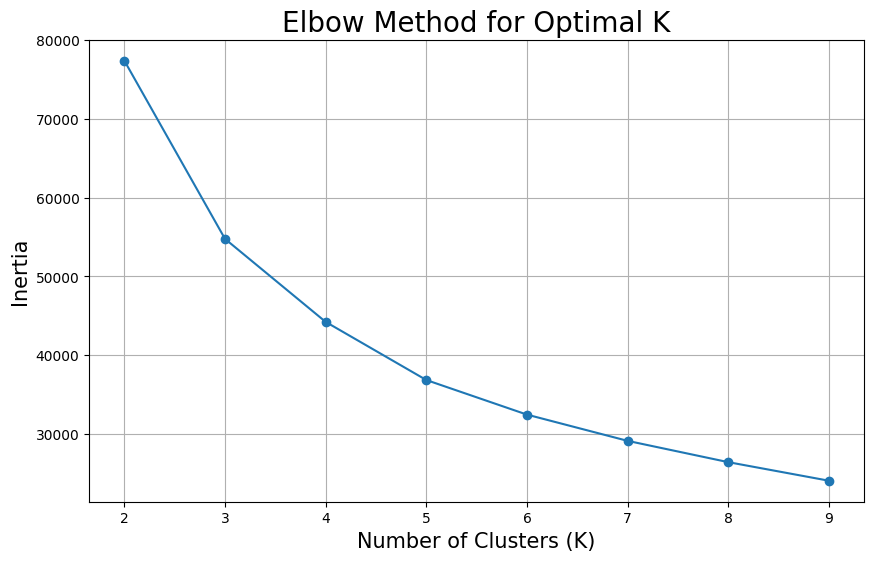

In [19]:
# Determine the optimal number of clusters using the Elbow method
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 10), scores, marker='o')
plt.grid(True)
plt.xlabel("Number of Clusters (K)", fontsize=15)
plt.ylabel("Inertia", fontsize=15)
plt.title("Elbow Method for Optimal K", fontsize=20)
plt.show()

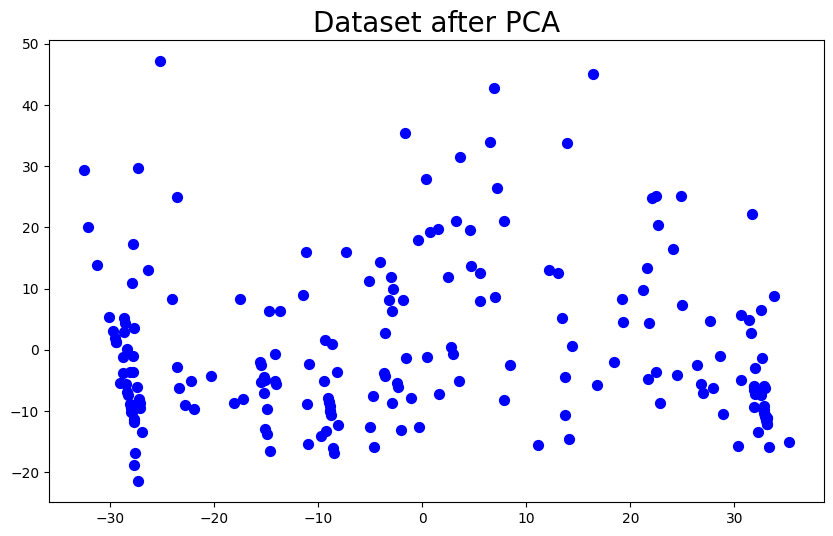

In [20]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
df_2D = pca.fit_transform(df)

plt.figure(figsize=(10, 6))
plt.scatter(df_2D[:, 0], df_2D[:, 1], s=50, color='b')
plt.title("Dataset after PCA", fontsize=20)
plt.show()

In [21]:
# Perform K-means clustering
k = 4  # Based on Elbow method analysis
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualizing the Results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
<ipython-input-22-92896126d1dd>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_clusters)


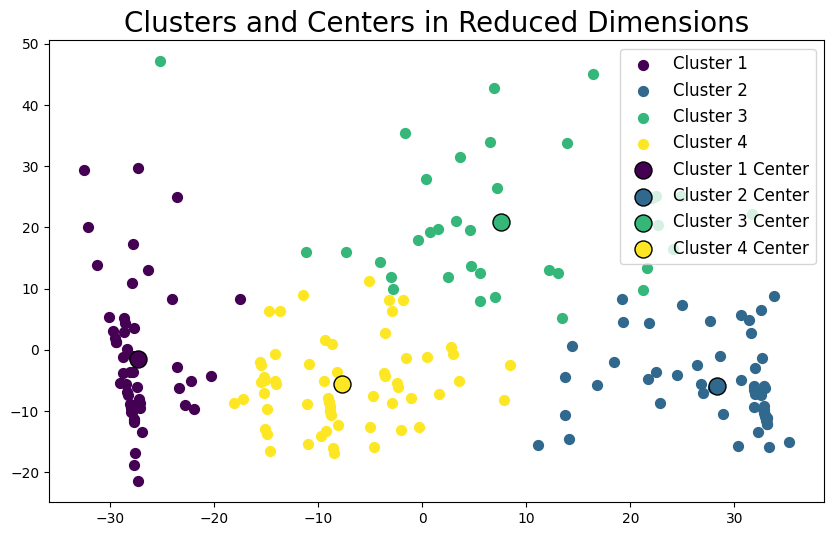

In [22]:
# Visualize clusters in 2D space
centers_2D = pca.transform(centers)
num_clusters = len(np.unique(y_pred))
colors = plt.cm.get_cmap('viridis', num_clusters)

plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    plt.scatter(df_2D[y_pred == cluster, 0], df_2D[y_pred == cluster, 1], s=50, color=colors(cluster), label=f'Cluster {cluster + 1}')

for cluster in range(num_clusters):
    plt.scatter(centers_2D[cluster, 0], centers_2D[cluster, 1], s=150, color=colors(cluster), edgecolor='black', label=f'Cluster {cluster + 1} Center')

plt.title("Clusters and Centers in Reduced Dimensions", fontsize=20)
plt.legend(fontsize=12)
plt.show()

In [23]:
# Display cluster centers in original feature space
centers_df = pd.DataFrame(centers, columns=df.columns)
centers_df.round(2)

,Age,Gender,Games-Lovers,Machine-Setup,Game-type,Games,Play-Games H/W,?PlayInBusyTimes,?GameBenefit
0,0.47,0.62,2.06,2.08,1.57,16.79,11.98,0.30,0.72
1,0.41,0.55,2.05,1.78,56.69,10.79,5.33,0.22,0.72
2,0.58,0.89,2.44,4.31,37.89,35.31,19.97,0.53,0.78
3,0.43,0.62,2.05,1.77,20.79,13.07,7.49,0.25,0.69


# Business Recommendations

This project can be useful for a video gaming company as it could:
- Customize ads and services for each segment.
- Develop new products based on interests of each segment.
- Recommend products for new customers by assigning the best cluster for each of them.